## Average Global Temperatures since 1850

In [1]:
import pandas as pd
import datetime
from time import strptime

import plotly.offline as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
from plotly import tools

The Earth is warmer now than at any time since reliable record-keeping began in 1880, and we're continuing to warm at an accelerated rate. In fact, the Earth is warmer now than at any point in modern human civilization. The first graph below shows us what global warming looks like month by month for the nearly 200 years now.

[HadCRUT4](https://www.metoffice.gov.uk/hadobs/hadcrut4/) is a gridded dataset of global historical surface temperature anomalies relative to a 1961-1990 reference period. The data are a mix of the [CRUTEM4](https://www.metoffice.gov.uk/hadobs/crutem4/) land-surface air temperature dataset and the [HadSST3](https://www.metoffice.gov.uk/hadobs/hadsst3/) sea-surface temperature (SST) dataset. The HadCRUT4 data are neither interpolated nor variance adjusted. The colorbar represents the differences from the baseline temperature in degrees celsius (°C).

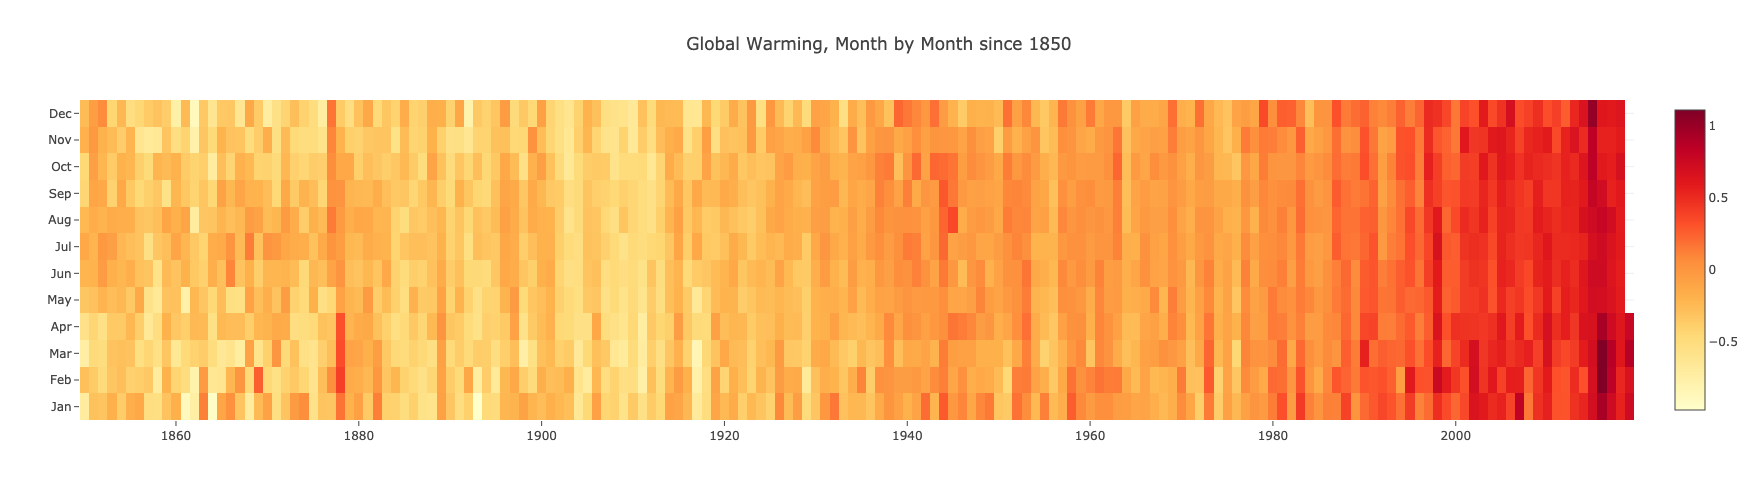

In [181]:
df = pd.read_csv('data/monthly_medians.csv')
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df = df.drop(['Date','Lower','Upper'], axis=1)

look_up = {'1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr', '5': 'May',
        '6': 'Jun', '7': 'Jul', '8': 'Aug', '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

df['Month'] = df['Month'].astype(str) 
df = df.replace({"Month": look_up})
df = df.groupby(['Year', 'Month'])['Median'].sum()
df = df.reset_index(level=1, drop=False).pivot(columns='Month', values='Median')
df = df[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

layout1 = cf.Layout(
    height=500,
    width=900,
    title='Global Warming, Month by Month since 1850'
)
df.iplot(kind='heatmap', theme='white', colorscale='YlOrRd',layout=layout1.to_plotly_json())

## Average Global Temperature Anomaly

How about annual temperature anomalies? Let's also map out the evolution of global warming on an annual basis, since the Industrial Revolution. On the y-axis below, we use the global average land-sea temperature over the 1961-1990 period as a baseline against which yearly changes in temperature are measured, in degrees celsius (°C). If we look at the total temperature increase since 1850 we can deduce that we have surpassed a one-degree temperature increase, bringing us closer to the global limit of keeping warming below two degrees celsius.

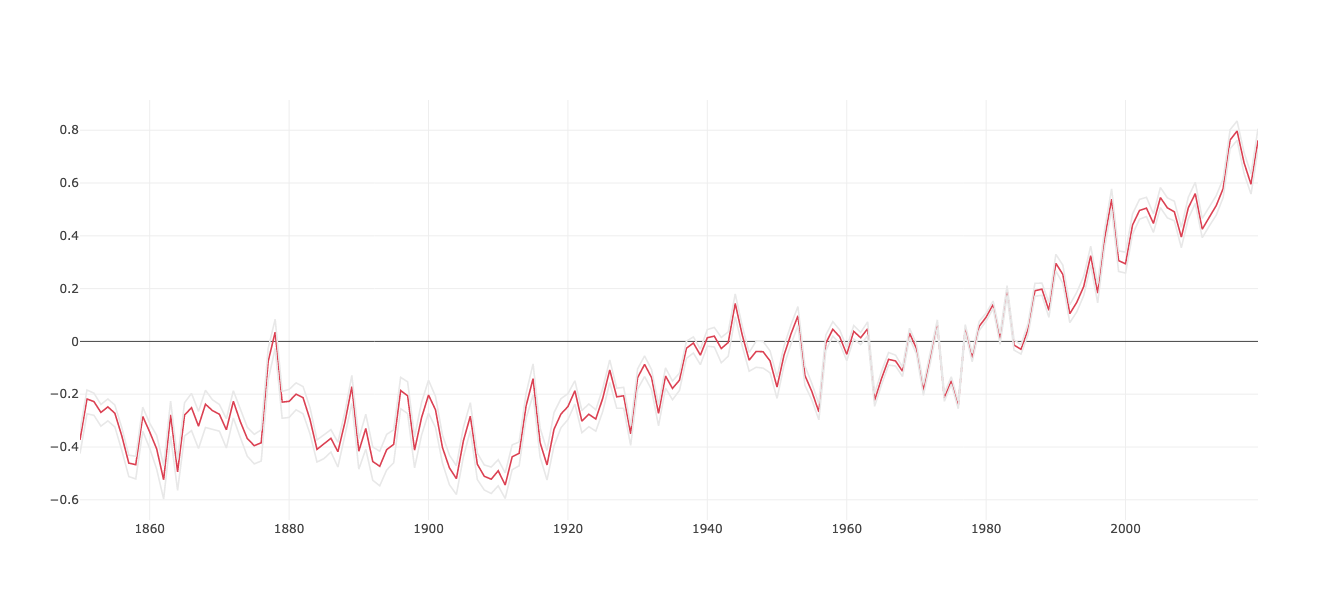

In [151]:
df = pd.read_csv('data/annual-anomalies.csv').drop('Scope', axis=1).set_index('Year')

layout1 = cf.Layout(
    height=600,
    width=900,
    showlegend=False
)

colors = ['red','#E8E8E8','#E8E8E8']

df.iplot(kind='scatter', layout=layout1,color=colors, width=1.6)

Source: https://www.metoffice.gov.uk/hadobs/hadcrut4/index.html